In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
import os
from os.path import join

# Introduction

## Aim

Visualize and analyze results of the 0D model sensitivity analysis.

## Prerequisites

Run the script `script_sensitivity_analysis.py` and have a folder structure as following (contents of `outputs/` directory is not shown): 

```
.
├── P0_Param_LeftVentricle_Emax0
│   ├── outputs
│   ├── parameters.txt
│   ├── table.csv
│   ├── Xexact.csv
│   └── Xpredicted.csv
├── P1_Param_LeftVentricle_EmaxRef0
│   ├── outputs
│   ├── parameters.txt
│   ├── table.csv
│   ├── Xexact.csv
│   └── Xpredicted.csv
├── P2_Param_LeftVentricle_AGain_Emax
│   ├── outputs
│   ├── parameters.txt
│   ├── table.csv
│   ├── Xexact.csv
│   └── Xpredicted.csv
└── P3_Param_LeftVentricle_kE
    ├── outputs
    ├── parameters.txt
    ├── table.csv
    ├── Xexact.csv
    └── Xpredicted.csv
```

## Setup

In [3]:
path = '/media/maousi/Data/tmp/sensitivity'

# Check data

## Aim

Verify that simulations in each directory actually has a single varying parameter. Visualize parameters distribution.

In [4]:
# Data containing values of the parameter that varies in a given folder
param_data = {}

for folder in os.listdir(path):
    print(f'=== {folder}')
    file = join(path, folder, 'parameters.txt')
    # Check file contents (that indeed a single parameter varies)
    !head -3 $file | tail -2
    
    param_name = folder[folder.find('_')+1:]
    df = pd.read_csv(file)
    param_data[param_name] = df[param_name].values

=== P0_Param_LeftVentricle_Emax0
0,1.58684302173822,1.296,0.3375,0.0125
1,1.5666355282188054,1.296,0.3375,0.0125
=== P1_Param_LeftVentricle_EmaxRef0
0,1.5722735619993853,1.2924126397239746,0.3375,0.0125
1,1.5722735619993853,1.3143532510000926,0.3375,0.0125
=== P2_Param_LeftVentricle_AGain_Emax
0,1.5722735619993853,1.298507705476186,0.34353599312872896,0.0125
1,1.5722735619993853,1.298507705476186,0.3419726489019648,0.0125
=== P3_Param_LeftVentricle_kE
0,1.5722735619993853,1.298507705476186,0.33729693894956475,0.012448355668621722
1,1.5722735619993853,1.298507705476186,0.33729693894956475,0.012728963670415117


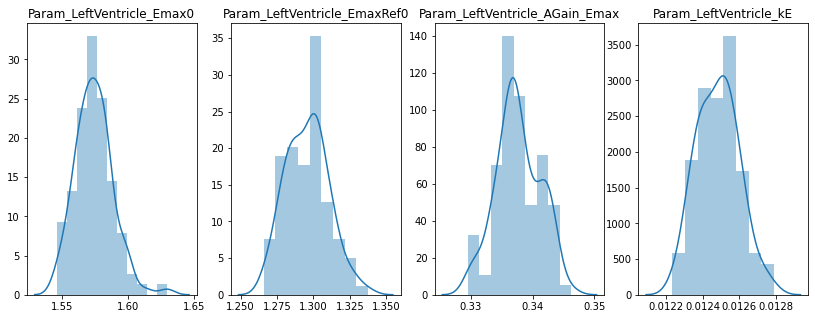

In [5]:
fig, axes = plt.subplots(1, len(param_data), figsize=(14,5))

for p, ax in zip(param_data, axes):
    sns.distplot(param_data[p], ax=ax)
    ax.set_title(p)

# Extract values

In [6]:
# Define utility function to format results table
def format_table(table):
    table.index = [
        'Min exact', 'Max exact', 'Mean exact', 'SD exact', 'Min pred', 
        'Max pred', 'Mean pred', 'SD pred', 'Avg err mx', 
        'Avg rel err%', 'SD error', 'CI min', 'CI max',
    ]
    table.columns = [
        'HR','SAPM','SAPS','SAPD', 'PAPM','PAPS','PAPD','LVEF',
        'LVEDV', 'LVESV', 'CI', 'PCPW'
    ]
    table.CI = table.CI.apply(np.abs)
    cols = {'Min exact': 'Min', 'Max exact': 'Max', 'Mean exact': 'Mean', 'SD exact': 'SD'}
    table = table.loc[list(cols.keys()), :]
    table = table.rename(cols)
    #table.index = table.index.set_levels(['Emax0','EmaxRef0','GainEmax','kE'], level=0)
    #table.index = ['Emax0','EmaxRef0','GainEmax','kE']
    #table.index.rename({'Param_LeftVentricle_Emax0':'test'}, inplace=True, level=0)
    return table

In [7]:
raw = {}
for folder in os.listdir(path):
    file = join(path, folder, 'table.csv')
    print(file)
    df = pd.read_csv(file, header=None)
    df = format_table(df)
    param_name = folder[folder.find('_')+1:]
    raw[param_name] = df

/media/maousi/Data/tmp/sensitivity/P0_Param_LeftVentricle_Emax0/table.csv
/media/maousi/Data/tmp/sensitivity/P1_Param_LeftVentricle_EmaxRef0/table.csv
/media/maousi/Data/tmp/sensitivity/P2_Param_LeftVentricle_AGain_Emax/table.csv
/media/maousi/Data/tmp/sensitivity/P3_Param_LeftVentricle_kE/table.csv


In [8]:
df = pd.concat(raw)
df.index = df.index.set_levels(['$E_{max,lv}$', '$E_{max,lv,0}$', 
                                '$G_{E_{max,lv}}$', '$k_{E,lv}$'], level=0)
df

HR       SAPM        SAPS       SAPD       PAPM  \
$E_{max,lv}$     Min   62.856002  90.364752  101.016480  85.038887  14.604146   
                 Max   63.492063  90.375765  101.041472  85.042912  14.608806   
                 Mean  63.472231  90.368450  101.024771  85.040290  14.607418   
                 SD     0.089034   0.001887    0.004232   0.000715   0.000767   
$E_{max,lv,0}$   Min   62.500000  90.334229  100.950435  85.026126  14.597695   
                 Max   63.946935  90.440971  101.205615  85.058649  14.612572   
                 Mean  63.039800  90.370094  101.030321  85.039981  14.607370   
                 SD     0.461940   0.021884    0.052438   0.006686   0.002999   
$G_{E_{max,lv}}$ Min   62.833047  90.361060  101.006775  85.038203  14.605813   
                 Max   63.492063  90.385073  101.065803  85.044708  14.608068   
                 Mean  63.452168  90.372516  101.034737  85.041406  14.607026   
                 SD     0.154094   0.005129    0.012600   0.001394   0.000473   
$k_{E,lv}$       Min   62.500000  90.323824  100.937660  85.016907  14.569238   
                 Max   63.863356  90.450909  101.227000  85.062863  14.636337   
                 Mean  63.216117  90.380144  101.055134  85.042648  14.603745   
                 SD     0.528620   0.028035    0.065594   0.009431   0.014242   

                            PAPS      PAPD       LVEF       LVEDV      LVESV  \
$E_{max,lv}$     Min   25.969768  8.921335  61.543292  107.959449  41.517650   
                 Max   25.972205  8.927113  61.546220  108.036306  41.545334   
                 Mean  25.971909  8.925172  61.545598  108.010619  41.534837   
                 SD     0.000348  0.000988   0.000426    0.013126   0.004835   
$E_{max,lv,0}$   Min   25.963472  8.914807  61.380693  107.390834  41.473596   
                 Max   25.972445  8.933287  61.583706  108.336656  41.656258   
                 Mean  25.971348  8.925382  61.538496  108.004700  41.540160   
                 SD     0.001529  0.003859   0.040423    0.186999   0.032213   
$G_{E_{max,lv}}$ Min   25.971093  8.923173  61.515522  107.884447  41.518766   
                 Max   25.972219  8.925992  61.558075  108.065591  41.542493   
                 Mean  25.971797  8.924641  61.538112  107.978793  41.530679   
                 SD     0.000217  0.000601   0.008848    0.038396   0.005224   
$k_{E,lv}$       Min   25.931407  8.888154  60.631358  106.497802  40.897401   
                 Max   25.981391  8.964529  61.827960  109.099242  42.950890   
                 Mean  25.966909  8.922163  61.433000  108.043586  41.670632   
                 SD     0.011679  0.015756   0.305771    0.530849   0.524114   

                             CI      PCPW  
$E_{max,lv}$     Min   0.006753  4.049211  
                 Max   0.007045  4.054770  
                 Mean  0.006859  4.052888  
                 SD    0.000050  0.000956  
$E_{max,lv,0}$   Min   0.004087  4.029195  
                 Max   0.012336  4.065146  
                 Mean  0.006924  4.052602  
                 SD    0.001607  0.007235  
$G_{E_{max,lv}}$ Min   0.006371  4.047519  
                 Max   0.008000  4.055273  
                 Mean  0.007142  4.051558  
                 SD    0.000342  0.001641  
$k_{E,lv}$       Min   0.003317  3.996573  
                 Max   0.013551  4.100407  
                 Mean  0.007639  4.047449  
                 SD    0.002099  0.021383

In [14]:
df.to_latex('data/sensitivity_analysis.tex', float_format="%.5g", 
            multirow=True, escape=False)#, longtable=True)

# Plot

In [11]:
df

HR       SAPM        SAPS       SAPD       PAPM  \
$E_{max,lv}$     Min   62.856002  90.364752  101.016480  85.038887  14.604146   
                 Max   63.492063  90.375765  101.041472  85.042912  14.608806   
                 Mean  63.472231  90.368450  101.024771  85.040290  14.607418   
                 SD     0.089034   0.001887    0.004232   0.000715   0.000767   
$E_{max,lv,0}$   Min   62.500000  90.334229  100.950435  85.026126  14.597695   
                 Max   63.946935  90.440971  101.205615  85.058649  14.612572   
                 Mean  63.039800  90.370094  101.030321  85.039981  14.607370   
                 SD     0.461940   0.021884    0.052438   0.006686   0.002999   
$G_{E_{max,lv}}$ Min   62.833047  90.361060  101.006775  85.038203  14.605813   
                 Max   63.492063  90.385073  101.065803  85.044708  14.608068   
                 Mean  63.452168  90.372516  101.034737  85.041406  14.607026   
                 SD     0.154094   0.005129    0.012600   0.001394   0.000473   
$k_{E,lv}$       Min   62.500000  90.323824  100.937660  85.016907  14.569238   
                 Max   63.863356  90.450909  101.227000  85.062863  14.636337   
                 Mean  63.216117  90.380144  101.055134  85.042648  14.603745   
                 SD     0.528620   0.028035    0.065594   0.009431   0.014242   

                            PAPS      PAPD       LVEF       LVEDV      LVESV  \
$E_{max,lv}$     Min   25.969768  8.921335  61.543292  107.959449  41.517650   
                 Max   25.972205  8.927113  61.546220  108.036306  41.545334   
                 Mean  25.971909  8.925172  61.545598  108.010619  41.534837   
                 SD     0.000348  0.000988   0.000426    0.013126   0.004835   
$E_{max,lv,0}$   Min   25.963472  8.914807  61.380693  107.390834  41.473596   
                 Max   25.972445  8.933287  61.583706  108.336656  41.656258   
                 Mean  25.971348  8.925382  61.538496  108.004700  41.540160   
                 SD     0.001529  0.003859   0.040423    0.186999   0.032213   
$G_{E_{max,lv}}$ Min   25.971093  8.923173  61.515522  107.884447  41.518766   
                 Max   25.972219  8.925992  61.558075  108.065591  41.542493   
                 Mean  25.971797  8.924641  61.538112  107.978793  41.530679   
                 SD     0.000217  0.000601   0.008848    0.038396   0.005224   
$k_{E,lv}$       Min   25.931407  8.888154  60.631358  106.497802  40.897401   
                 Max   25.981391  8.964529  61.827960  109.099242  42.950890   
                 Mean  25.966909  8.922163  61.433000  108.043586  41.670632   
                 SD     0.011679  0.015756   0.305771    0.530849   0.524114   

                             CI      PCPW  
$E_{max,lv}$     Min   0.006753  4.049211  
                 Max   0.007045  4.054770  
                 Mean  0.006859  4.052888  
                 SD    0.000050  0.000956  
$E_{max,lv,0}$   Min   0.004087  4.029195  
                 Max   0.012336  4.065146  
                 Mean  0.006924  4.052602  
                 SD    0.001607  0.007235  
$G_{E_{max,lv}}$ Min   0.006371  4.047519  
                 Max   0.008000  4.055273  
                 Mean  0.007142  4.051558  
                 SD    0.000342  0.001641  
$k_{E,lv}$       Min   0.003317  3.996573  
                 Max   0.013551  4.100407  
                 Mean  0.007639  4.047449  
                 SD    0.002099  0.021383